In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6
from datetime import datetime

In [154]:
df = pd.read_csv("/Users/prateek/Desktop/abcd/Historical Product Demand.csv")

In [155]:
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
Product_Code        1048575 non-null object
Warehouse           1048575 non-null object
Product_Category    1048575 non-null object
Date                1037336 non-null object
Order_Demand        1048575 non-null object
dtypes: object(5)
memory usage: 40.0+ MB


In [30]:
df.describe()



,Product_Code,Warehouse,Product_Category,Date,Order_Demand
count,1048575,1048575,1048575,1037336,1048575
unique,2160,4,33,1729,3828
top,Product_1359,Whse_J,Category_019,2013/9/27,1000
freq,16936,764447,481099,2075,112682


In [31]:
df.Date.isnull().sum()/df.Date.isnull().count()

0.010718355863910546

In [32]:
df.Date.isnull().count()

1048575

In [156]:
df2 = df.dropna()
#dropped null rows

In [157]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037336 entries, 0 to 1048574
Data columns (total 5 columns):
Product_Code        1037336 non-null object
Warehouse           1037336 non-null object
Product_Category    1037336 non-null object
Date                1037336 non-null object
Order_Demand        1037336 non-null object
dtypes: object(5)
memory usage: 47.5+ MB


In [158]:
df2['Date'] = pd.to_datetime(df2['Date'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037336 entries, 0 to 1048574
Data columns (total 5 columns):
Product_Code        1037336 non-null object
Warehouse           1037336 non-null object
Product_Category    1037336 non-null object
Date                1037336 non-null datetime64[ns]
Order_Demand        1037336 non-null object
dtypes: datetime64[ns](1), object(4)
memory usage: 47.5+ MB


In [159]:
dftop = df2.loc[df2['Order_Demand'].str.startswith('(')]

dfbottom = df2.loc[~df2['Order_Demand'].str.startswith('(')]

print(dftop.shape)
print(dfbottom.shape)

(5899, 5)
(1031437, 5)


In [160]:
dfbottom['Order_Demand'] = dfbottom['Order_Demand'].astype(int)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [161]:
dfbottom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031437 entries, 0 to 1048574
Data columns (total 5 columns):
Product_Code        1031437 non-null object
Warehouse           1031437 non-null object
Product_Category    1031437 non-null object
Date                1031437 non-null datetime64[ns]
Order_Demand        1031437 non-null int64
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 47.2+ MB


In [7]:
td = pd.pivot_table(dfbottom, index = ['Date'], columns = ['Warehouse'], values = ['Order_Demand'], aggfunc = np.sum)
td.head()

Order_Demand                      
Warehouse        Whse_A Whse_C  Whse_J Whse_S
Date                                         
2011/1/8            2.0    NaN     NaN    NaN
2011/10/31          NaN    3.0     NaN    NaN
2011/11/18       4001.0    NaN     NaN    NaN
2011/11/21        110.0    NaN     NaN    NaN
2011/11/22       3700.0    NaN  2040.0    NaN

In [109]:
td.columns = ['Whse_A', 'Whse_C', 'Whse_J', 'Whse_S']
td.head()

,Whse_A,Whse_C,Whse_J,Whse_S
Date,,,,
2011-01-08,2.0,NaN,NaN,NaN
2011-05-31,108.0,NaN,NaN,NaN
2011-06-24,NaN,NaN,NaN,92000.0
2011-09-02,NaN,1250.0,NaN,NaN
2011-09-27,NaN,28.0,NaN,NaN


In [110]:
td = td.sort_values('Date', ascending = True)
td.head()



,Whse_A,Whse_C,Whse_J,Whse_S
Date,,,,
2011-01-08,2.0,NaN,NaN,NaN
2011-05-31,108.0,NaN,NaN,NaN
2011-06-24,NaN,NaN,NaN,92000.0
2011-09-02,NaN,1250.0,NaN,NaN
2011-09-27,NaN,28.0,NaN,NaN


In [126]:
td = td.groupby(['Date']).sum()

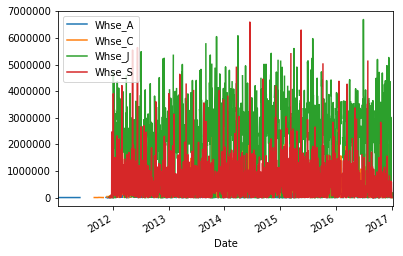

In [111]:
td.plot()

In [183]:
tdq = td.copy()



In [184]:
tdq.index = tdq.index.to_period("M")
#Change to Quarterly


In [185]:
#tdq.index = tdq.index.to_period("M")
#Change to Quarterly



#tdq['Qtr'] = pd.to_datetime(tdq['Date'].values, format='%Y-%m').astype('period[M]')
##to datetime. Q not working without it


KeyError: 'Date'

In [186]:
#tdq = tdq.reset_index()
tdq.head()

,Whse_A,Whse_C,Whse_J,Whse_S
Date,,,,
2011-01,2.0,NaN,NaN,NaN
2011-05,108.0,NaN,NaN,NaN
2011-06,NaN,NaN,NaN,92000.0
2011-09,NaN,1250.0,NaN,NaN
2011-09,NaN,28.0,NaN,NaN


In [117]:
#tdq = tdq.drop(columns = ['level_0','index'])

In [115]:
#tdq = tdq.rename(columns={'Date': 'Quarter'})
#Rename to Quarter
#tdq.head()

,Quarter,Whse_A,Whse_C,Whse_J,Whse_S
0,2011-01-08,2.0,NaN,NaN,NaN
1,2011-05-31,108.0,NaN,NaN,NaN
2,2011-06-24,NaN,NaN,NaN,92000.0
3,2011-09-02,NaN,1250.0,NaN,NaN
4,2011-09-27,NaN,28.0,NaN,NaN


In [187]:
tdq = tdq.groupby(['Date']).sum()

tdq.head()

,Whse_A,Whse_C,Whse_J,Whse_S
Date,,,,
2011-01,2.0,0.0,0.0,0.0
2011-05,108.0,0.0,0.0,0.0
2011-06,0.0,0.0,0.0,92000.0
2011-09,0.0,6728.0,0.0,0.0
2011-10,0.0,3.0,0.0,0.0


Index(['Quarter', 'Whse_A', 'Whse_C', 'Whse_J', 'Whse_S'], dtype='object')

In [137]:
#tdq.plot()

In [188]:
tdWJ = tdq.loc[:, ["Whse_J"]] 

In [191]:
#tdWJ = tdWJ.iloc[7:-1] #Delete first 7 rows and last 1

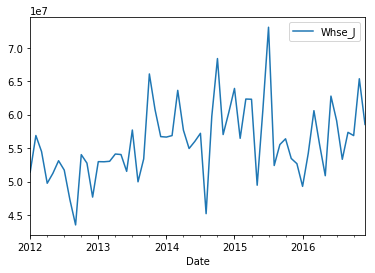

In [193]:
tdWJ.plot()

In [8]:
md = pd.pivot_table(dfbottom, index = ['Product_Code'],  values = ['Order_Demand'], aggfunc = np.sum)
md.head()

,Order_Demand
Product_Code,
Product_0001,456200
Product_0002,8796000
Product_0003,118000
Product_0004,124300
Product_0005,22300


In [9]:
md1 = md.sort_values('Order_Demand', ascending = False).head(10)

In [10]:
md1

,Order_Demand
Product_Code,
Product_1359,471592000
Product_1248,289022000
Product_0083,210539000
Product_1341,169777000
Product_1295,122647500
Product_1241,116563000
Product_1245,103237000
Product_1286,101449100
Product_1432,97106000


In [141]:
md1.index

Index(['Product_1359', 'Product_1248', 'Product_0083', 'Product_1341',
       'Product_1295', 'Product_1241', 'Product_1245', 'Product_1286',
       'Product_1432', 'Product_1274'],
      dtype='object', name='Product_Code')

In [162]:
## create df based on product codes

Products = ['Product_1359', 'Product_1248', 'Product_0083', 'Product_1341',
       'Product_1295', 'Product_1241', 'Product_1245', 'Product_1286',
       'Product_1432', 'Product_1274']
ProductDF = dfbottom[dfbottom.Product_Code.isin(Products)]
ProductDF.shape

(63398, 5)

In [12]:
ProductDF.shape

(63398, 5)

In [13]:
ProductDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63398 entries, 65 to 1048228
Data columns (total 5 columns):
Product_Code        63398 non-null object
Warehouse           63398 non-null object
Product_Category    63398 non-null object
Date                63398 non-null object
Order_Demand        63398 non-null int64
dtypes: int64(1), object(4)
memory usage: 2.9+ MB


In [169]:
Productpt = pd.pivot_table(ProductDF, index = ['Date'], columns = ['Product_Code'], values = ['Order_Demand'], aggfunc = np.sum)
Productpt.head()

Order_Demand                                                      \
Product_Code Product_0083 Product_1241 Product_1245 Product_1248 Product_1274   
Date                                                                            
2011-12-21            NaN          NaN          NaN          NaN          NaN   
2011-12-23            NaN      30000.0          NaN          NaN          NaN   
2011-12-26            NaN          NaN          NaN          NaN          NaN   
2011-12-27            NaN          NaN          NaN          NaN          NaN   
2011-12-28            NaN          NaN     900000.0          NaN          NaN   

                                                                               
Product_Code Product_1286 Product_1295 Product_1341 Product_1359 Product_1432  
Date                                                                           
2011-12-21            NaN          NaN          NaN          NaN      10000.0  
2011-12-23            NaN          NaN      30000.0          NaN          NaN  
2011-12-26            NaN          NaN    1000000.0          NaN     168000.0  
2011-12-27            NaN          NaN    1000000.0          NaN          NaN  
2011-12-28            NaN          NaN     200000.0          NaN          NaN

In [170]:
Productpt.columns = ['Product_0083', 'Product_1241', 'Product_1245', 'Product_1248', 'Product_1274', 'Product_1286', 'Product_1295', 'Product_1341', 'Product_1359', 'Product_1432']
Productpt.head()

,Product_0083,Product_1241,Product_1245,Product_1248,Product_1274,Product_1286,Product_1295,Product_1341,Product_1359,Product_1432
Date,,,,,,,,,,
2011-12-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.0
2011-12-23,NaN,30000.0,NaN,NaN,NaN,NaN,NaN,30000.0,NaN,NaN
2011-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000000.0,NaN,168000.0
2011-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000000.0,NaN,NaN
2011-12-28,NaN,NaN,900000.0,NaN,NaN,NaN,NaN,200000.0,NaN,NaN


In [171]:
Productpt = Productpt.groupby(['Date']).sum()
Productpt.head()

,Product_0083,Product_1241,Product_1245,Product_1248,Product_1274,Product_1286,Product_1295,Product_1341,Product_1359,Product_1432
Date,,,,,,,,,,
2011-12-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0
2011-12-23,0.0,30000.0,0.0,0.0,0.0,0.0,0.0,30000.0,0.0,0.0
2011-12-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000000.0,0.0,168000.0
2011-12-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000000.0,0.0,0.0
2011-12-28,0.0,0.0,900000.0,0.0,0.0,0.0,0.0,200000.0,0.0,0.0


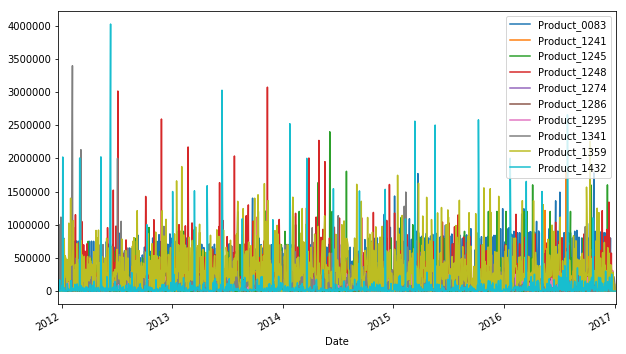

In [172]:
Productpt.plot()

In [173]:
#Quarterly Products
Productptq = Productpt.copy()

In [19]:
#Productptq.index = Productptq.index.to_period("Q")
#Change to Quarterly
#Productptq.index = pd.to_datetime(Productptq['Date'].values, format='%Y-%m').astype('period[Q]')


AttributeError: 'Index' object has no attribute 'to_period'

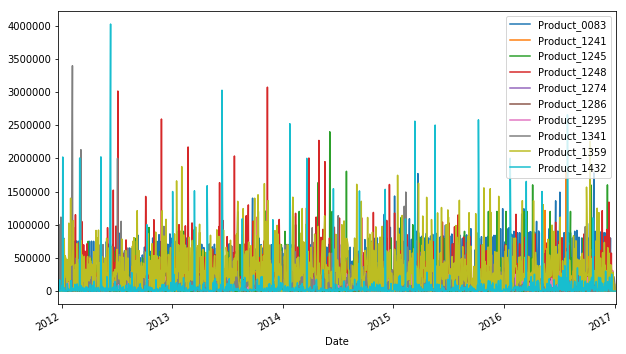

In [174]:
Productptq = Productptq.groupby(['Date']).sum()
Productptq.plot()

In [32]:
Productwh = pd.pivot_table(ProductDF, index = ['Warehouse', 'Product_Category' , 'Product_Code'], values = ['Order_Demand'], aggfunc = np.sum)

Productwh.columns = ['Order_Demand']
Productwh

Order_Demand
Warehouse Product_Category Product_Code              
Whse_A    Category_019     Product_1432       1939000
Whse_C    Category_019     Product_0083      13257000
                           Product_1241       6776000
                           Product_1245      90078000
                           Product_1341      42672000
                           Product_1432      23187000
Whse_J    Category_019     Product_0083      12784000
                           Product_1241      77522000
                           Product_1248     289022000
                           Product_1274      92803000
                           Product_1286     101449100
                           Product_1295     122647500
                           Product_1359     471592000
                           Product_1432      18838000
Whse_S    Category_019     Product_0083     184498000
                           Product_1241      32265000
                           Product_1245      13159000
                           Product_1341     127105000
                           Product_1432      53142000

In [175]:
#Productpt1359 = Productpt['Product_1359']
Productpt1359 = Productpt.loc[:, ["Product_1359"]] 
Productpt1359.head()

,Product_1359
Date,
2011-12-21,0.0
2011-12-23,0.0
2011-12-26,0.0
2011-12-27,0.0
2011-12-28,0.0


In [176]:
Productpt1359.columns = ['Orders']
Productpt1359.head()

,Orders
Date,
2011-12-21,0.0
2011-12-23,0.0
2011-12-26,0.0
2011-12-27,0.0
2011-12-28,0.0


In [181]:
Productpt1359 = Productpt1359.reset_index()

#Productpt1359.index = Productpt1359.index.to_period("M")
#Change to Quarterly



#tdq['Qtr'] = pd.to_datetime(tdq['Date'].values, format='%Y-%m').astype('period[M]')
##to datetime. Q not working without it



In [66]:
#Productpt1359['Date'] = Productpt1359['Date'].strptime("%y"/"%m")
#Productpt1359

In [69]:
#Productpt1359['Date'].dtype


#Productpt1359[['Year', 'Month', 'Day']] = Productpt1359['Date'].str.split('/', expand = True)

In [183]:
Productpt1359.head()

,Date,Orders
0,2011-12-21,0.0
1,2011-12-23,0.0
2,2011-12-26,0.0
3,2011-12-27,0.0
4,2011-12-28,0.0


In [71]:
#Productpt1359['Year_Month'] = str(Productpt1359['Year']) + '_' + str(Productpt1359['Month'])

In [78]:
Productpt1359['Date'] = pd.to_datetime(Productpt1359['Date'], '%m/%y')

In [89]:
#Productpt1359['Date'] = datetime.strptime(Productpt1359['Date'], '%m/%y')
Productpt1359.Date.datetime.strftime('%m/%y')

AttributeError: 'Series' object has no attribute 'datetime'

In [184]:
Productpt1359 = Productpt1359.set_index('Date').resample('M').sum()

In [188]:
#Productpt1359 = Productpt1359.iloc[1:-1] #Drop first and last row

In [191]:
Productpt1359.tail()

,Orders
Date,
2016-08-31,6934000.0
2016-09-30,6960000.0
2016-10-31,7712000.0
2016-11-30,8814000.0
2016-12-31,5653000.0


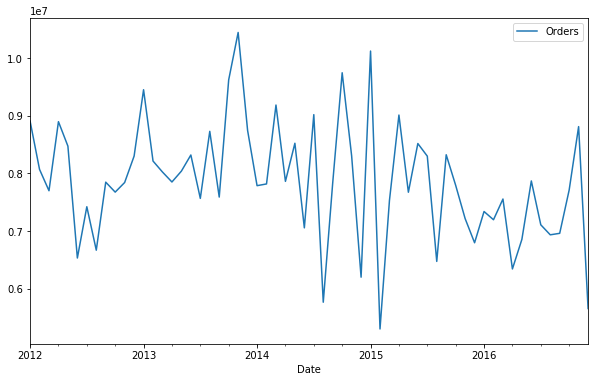

In [190]:
Productpt1359.plot()

In [192]:
#rolling stats
rollmean1359 = Productpt1359.rolling(window=12).mean()

rollstd1359 = Productpt1359.rolling(window=12).std()
print(rollmean1359, rollstd1359)

                  Orders
Date                    
2012-01-31           NaN
2012-02-29           NaN
2012-03-31           NaN
2012-04-30           NaN
2012-05-31           NaN
2012-06-30           NaN
2012-07-31           NaN
2012-08-31           NaN
2012-09-30           NaN
2012-10-31           NaN
2012-11-30           NaN
2012-12-31  7.862167e+06
2013-01-31  7.907583e+06
2013-02-28  7.919667e+06
2013-03-31  7.946750e+06
2013-04-30  7.859417e+06
2013-05-31  7.823250e+06
2013-06-30  7.972417e+06
2013-07-31  7.984500e+06
2013-08-31  8.156583e+06
2013-09-30  8.135000e+06
2013-10-31  8.297500e+06
2013-11-30  8.514750e+06
2013-12-31  8.551917e+06
2014-01-31  8.413000e+06
2014-02-28  8.379833e+06
2014-03-31  8.476833e+06
2014-04-30  8.477750e+06
2014-05-31  8.518083e+06
2014-06-30  8.412583e+06
2014-07-31  8.533833e+06
2014-08-31  8.286417e+06
2014-09-30  8.307083e+06
2014-10-31  8.317417e+06
2014-11-30  8.138750e+06
2014-12-31  7.926250e+06
2015-01-31  8.121167e+06
2015-02-28  7.911167e+06


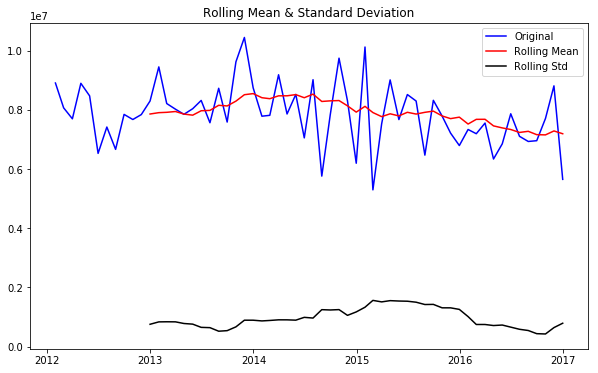

In [193]:
orig1359 = plt.plot(Productpt1359, color='blue', label = 'Original')
mean1359 = plt.plot(rollmean1359, color = 'red', label = 'Rolling Mean')
std1359 = plt.plot(rollstd1359, color = 'black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [194]:
#Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print ('Results of Dickey-Fuller Test:')
test1359 = adfuller(Productpt1359['Orders'], autolag='AIC')

output1359 = pd.Series(test1359[0:4], index=['Test Statistic', 'p-value', '#lags used', 'Number of Observations used'])
for key,value in test1359[4].items():
 output1359['Critical Value (%s)'%key] = value
print(output1359)

# Data is stationary. p-value<0.05. Test Statistic less than critical valuec

Results of Dickey-Fuller Test:
Test Statistic                -7.688952e+00
p-value                        1.436333e-11
#lags used                     0.000000e+00
Number of Observations used    5.900000e+01
Critical Value (1%)           -3.546395e+00
Critical Value (5%)           -2.911939e+00
Critical Value (10%)          -2.593652e+00
dtype: float64


In [195]:
#Check mean and variance
X = Productpt1359.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=8173566.666667, mean2=7542833.333333
variance1=687833378888.888916, variance2=1297545872222.222168


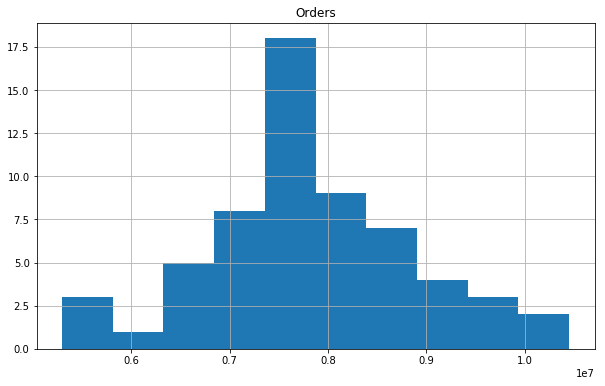

In [197]:
Productpt1359.hist()
plt.show()

In [139]:
X = Productpt1359.values
train = X[0:48]
test = X[48:]
predictions = []

In [129]:
test.size

12

In [140]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_artrain = AR(train)
model_artrain_fit = model_artrain.fit()

In [142]:
predictions = model_artrain_fit.predict(start=48, end = 60)

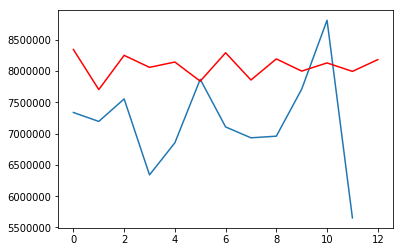

In [143]:
plt.plot(test)
plt.plot(predictions, color= 'red')

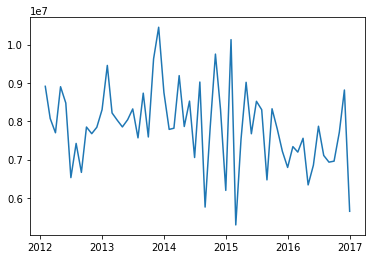

In [145]:
plt.plot(Productpt1359)


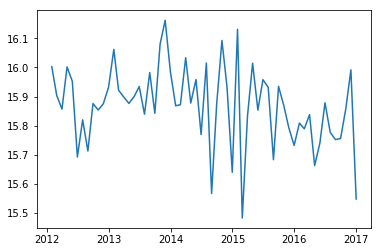

In [101]:
Productpt1359logscale = np.log(Productpt1359)
plt.plot(Productpt1359logscale)

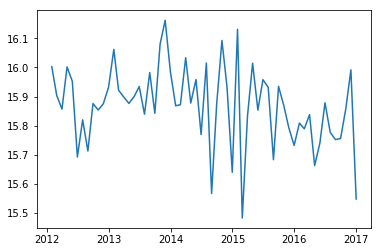

In [102]:
#rolling stats log
rollmean1359log = Productpt1359logscale.rolling(window=365).mean()

rollstd1359log = Productpt1359logscale.rolling(window=365).std()
plt.plot(Productpt1359logscale)
plt.plot(rollmean1359log, color = 'red')
plt.plot(rollstd1359log, color='black')

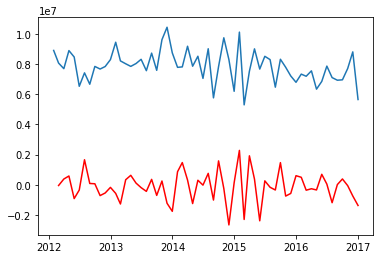

In [104]:
#AR Model
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(Productpt1359, order=(2, 1, 0), freq=Productpt1359.index.inferred_freq)  
results_AR = model.fit(disp=-1)  
plt.plot(Productpt1359)

plt.plot(results_AR.fittedvalues, color='red')
plt.show()

In [106]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(Productpt1359)
model_ar_fit = model_ar.fit()

In [110]:
predictions = model_ar_fit.predict()

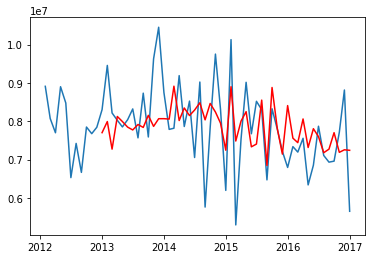

In [111]:
plt.plot(Productpt1359)
plt.plot(predictions, color = 'red')

ValueError: Found input variables with inconsistent numbers of samples: [12, 13]

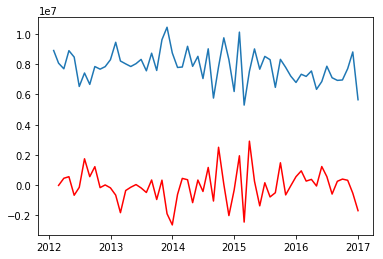

In [113]:
#ARIMA Model

from statsmodels.tsa.arima_model import ARIMA

model_arima = ARIMA(Productpt1359, order=(1, 1, 1)) #, freq=Productpt1359.index.inferred_freq)  
results_arima = model_arima.fit()
#predictions_Arima = model
#.fit(disp=-1)  
plt.plot(Productpt1359)

plt.plot(results_arima.fittedvalues, color='red')
plt.show()

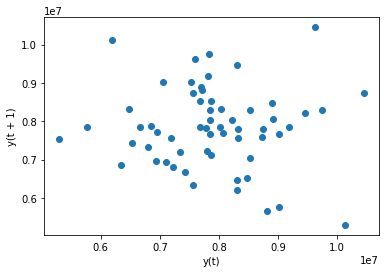

In [121]:
from pandas.plotting import lag_plot
lag_plot(Productpt1359)
plt.show()

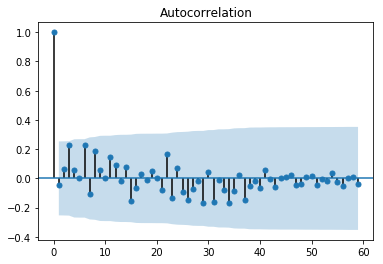

In [123]:
#1st lag shows negative . shows stationarity
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(Productpt1359)
plt.show()

In [105]:
#MA Model

from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(Productpt1359, order=(0, 1, 2), freq=Productpt1359.index.inferred_freq)  
results_MA = model.fit(disp=-1)  
plt.plot(Productpt1359)

plt.plot(results_MA.fittedvalues, color='red')
plt.show()

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

In [197]:
#rolling stats
rollmeantdWJ = tdWJ.rolling(window=12).mean()

rollstdWJ = tdWJ.rolling(window=12).std()
print(rollmeantdWJ, rollstdWJ)

               Whse_J
Date                 
2012-01           NaN
2012-02           NaN
2012-03           NaN
2012-04           NaN
2012-05           NaN
2012-06           NaN
2012-07           NaN
2012-08           NaN
2012-09           NaN
2012-10           NaN
2012-11           NaN
2012-12  5.115963e+07
2013-01  5.128891e+07
2013-02  5.096220e+07
2013-03  5.084115e+07
2013-04  5.120503e+07
2013-05  5.143867e+07
2013-06  5.130655e+07
2013-07  5.180519e+07
2013-08  5.202900e+07
2013-09  5.285019e+07
2013-10  5.385457e+07
2013-11  5.452057e+07
2013-12  5.527321e+07
2014-01  5.557899e+07
2014-02  5.590490e+07
2014-03  5.678784e+07
2014-04  5.708523e+07
2014-05  5.716021e+07
2014-06  5.753177e+07
2014-07  5.749066e+07
2014-08  5.709421e+07
2014-09  5.762456e+07
2014-10  5.781617e+07
2014-11  5.750601e+07
2014-12  5.780794e+07
2015-01  5.841336e+07
2015-02  5.837929e+07
2015-03  5.827134e+07
2015-04  5.865559e+07
2015-05  5.819876e+07
2015-06  5.859002e+07
2015-07  5.991026e+07
2015-08  6

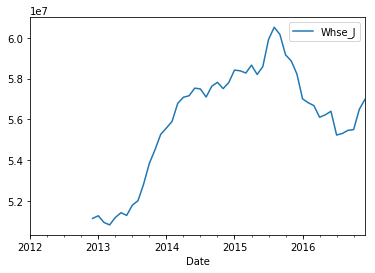

In [201]:
rollmeantdWJ.plot()

In [198]:
origtdWJ = plt.plot(tdWJ, color='blue', label = 'Original')
meantdWJ = plt.plot(rollmeantdWJ, color = 'red', label = 'Rolling Mean')
stdtdWJ = plt.plot(rollstdWJ, color = 'black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

TypeError: Axis must have `freq` set to convert to Periods

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x1137ad510> (for post_execute):


ValueError: view limit minimum 0.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum 0.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

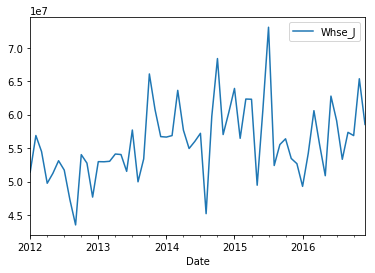

In [199]:
tdWJ.plot()

In [205]:
#Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print ('Results of Dickey-Fuller Test:')
testtdWJ = adfuller(tdWJ['Whse_J'], autolag='AIC')

outputtdWJ = pd.Series(testtdWJ[0:4], index=['Test Statistic', 'p-value', '#lags used', 'Number of Observations used'])
for key,value in test1359[4].items():
 outputtdWJ['Critical Value (%s)'%key] = value
print(outputtdWJ)

Results of Dickey-Fuller Test:
Test Statistic                 -2.222209
p-value                         0.198284
#lags used                      2.000000
Number of Observations used    57.000000
Critical Value (1%)            -3.434977
Critical Value (5%)            -2.863583
Critical Value (10%)           -2.567858
dtype: float64
